<a href="https://colab.research.google.com/github/143biswajit/Bike_Sharing_Demand_Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

### **1. Installing and importing the required libraries**

In [8]:
#Importing Librabary for python data manipulation
import pandas as pd
import numpy as np

#Import librabary for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Importing librabary for data type Transfermation
from datetime import datetime
import datetime as dt

# Importing Librabary for data Encoding
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

#Importing Librabary for machinelearing Regression Implementain 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#Importing Librabry for Make Ml model simple and acurate
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV


#Importing Librabary for evaluation of model
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

#Avoding the worning
import warnings
warnings.filterwarnings('ignore')

# **Load data into the dataframe:**

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# making a variable for reading the csv file
data = pd.read_excel('/content/drive/MyDrive/ALMABETTER  /Bike sharing Demand prediction - Biswajit Gochhayat/SeoulBikeData.xlsx')

**Making A DEEP COPY:**

In [11]:
# making a deep copy of our orginal data set
df = data.copy()

In [12]:
# checking the 1st 10 lines of our data set for batter understanding.
df.head(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,2017-12-01,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,2017-12-01,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,2017-12-01,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,2017-12-01,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,2017-12-01,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


**Column information & Data Types**

Now lets take a high-level look over the data using the .info() method:

In [13]:
df.shape

(8760, 14)

In [14]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [16]:
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

**Data Description**

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


**So hear we can see that our data is not normal distributed ,the( mean > median)**

In [18]:
# Object type data descreption
df.describe(include ='object')

,Seasons,Holiday,Functioning Day
count,8760,8760,8760
unique,4,2,2
top,Spring,No Holiday,Yes
freq,2208,8328,8465


**OVERVIEW**




Number of rows: 8760



Number of columns: 14

Missing values: 0

Missing values (%): 0%

In [19]:
# Checking Duplicate Values
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8755    False
8756    False
8757    False
8758    False
8759    False
Length: 8760, dtype: bool

In [20]:
df.columns


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

**Renaming the coulumns for simplicity**

In [21]:
# Renaming the column for simlicity
df.rename(columns={"Temperature(°C)":"Temperature","Humidity(%)":"Humidity","Wind speed (m/s)":"Wind_speed","Visibility (10m)":"Visibility","Dew point temperature(°C)":"Dew_point_temp","Solar Radiation (MJ/m2)":"Solar_Radiation","Snowfall (cm)":"Snowfall" ,"Rented Bike Count":"Rent_count","Rainfall(mm)":"Rainfall"},inplace=True)
#separating all date , month and year to get a  better insides from data
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [22]:
df.head()

,Date,Rent_count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temp,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,year,month,day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1


**Finding how many unique value are present and what are those.**

In [23]:
#How many uinque items are present in our data set in each columns:
for i in df:
  a = df[i].nunique()   
  if df[i].nunique() >=13:
    print(i, 'has' , a ,'unique value')
    print("*"*50)

  else :
    print(i, 'has' ,a, 'unique values and those are\n',df[i].value_counts())
    print("*"*50)

Date has 365 unique value
**************************************************
Rent_count has 2166 unique value
**************************************************
Hour has 24 unique value
**************************************************
Temperature has 546 unique value
**************************************************
Humidity has 90 unique value
**************************************************
Wind_speed has 65 unique value
**************************************************
Visibility has 1789 unique value
**************************************************
Dew_point_temp has 556 unique value
**************************************************
Solar_Radiation has 345 unique value
**************************************************
Rainfall has 61 unique value
**************************************************
Snowfall has 51 unique value
**************************************************
Seasons has 4 unique values and those are
 Spring    2208
Summer    2208
Autumn    2184
Winter    

# **EDA - Exploratory data analysis**

**a) Year-wise monts distribution:**

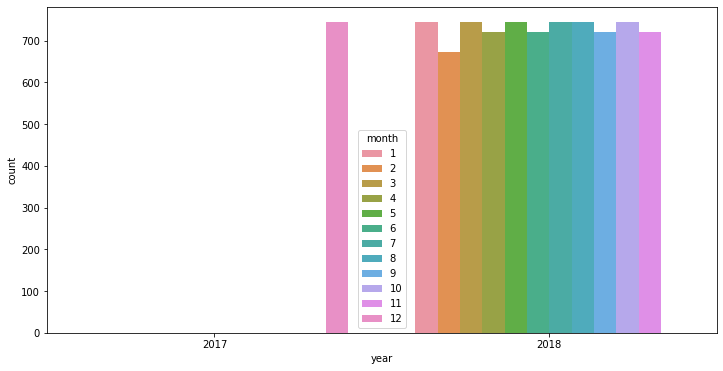

In [24]:
plt.figure(figsize =(12,6))
sns.countplot(x= 'year',hue='month',data=df)

**in our data set the year 2017ts only december is present and in 2018 jan to nove is present**

**b) Count of Functioning Day:**

In [25]:
Functioning_day = df[df['Functioning Day'] == 'Yes']
no_Functioning_day = df[df['Functioning Day'] == 'No']
# Functioning_day.head()
# no_Functioning_day.head()

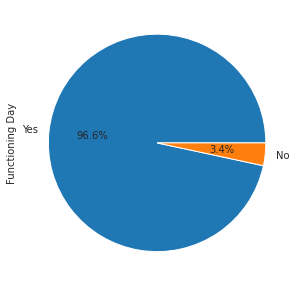

In [26]:
# Percentage of  present in our data set
sns.set_style('whitegrid')
plot = df["Functioning Day"].value_counts().plot.pie(x ='Yes', y = 'No' , autopct='%1.1f%%', figsize=(5,5))

**The "No" Functioning day are less ni count in our data set**

**c)Count of Holiday :**

In [27]:
Holi_day = df[df['Holiday'] == 'Holiday']
no_Holi_day = df[df['Holiday'] == 'No Holiday']
# Holi_day.head()
# no_Functioning_day.head()

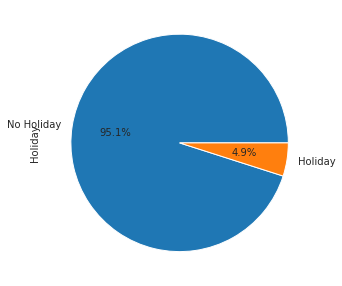

In [28]:
sns.set_style('whitegrid')
plot = df["Holiday"].value_counts().plot.pie(x ='No Holiday	', y = 'Holiday' , autopct='%1.1f%%', figsize=(5,5))

**percentage of holiday is less then no holiday.**

**e)Year wise Holiday count:**

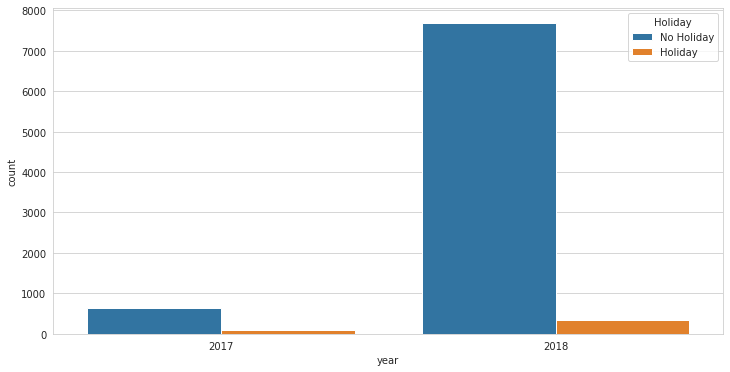

In [29]:
plt.figure(figsize =(12,6))
sns.countplot(x= 'year',hue='Holiday',data=df)

By the help of year . We clrarly count that holiday is less then no holiday.

**f) Season wise - Snowfall, Rainfall, Solar_Radiation, Dew_point_temp effectts on Rent_count**




In [30]:
imp = df.groupby(['month', 'Seasons'],as_index=False).agg({'Snowfall':"sum","Rainfall":"sum","Solar_Radiation":"sum","Dew_point_temp":"sum","Rent_count":"mean"}).sort_values(by='month')
imp

,month,Seasons,Snowfall,Rainfall,Solar_Radiation,Dew_point_temp,Rent_count
0,1,Winter,190.0,8.5,168.70,-10351.9,201.620968
1,2,Winter,68.6,27.6,323.68,-8771.8,225.941964
2,3,Spring,0.0,51.5,446.41,-201.4,511.551075
3,4,Spring,0.0,130.3,513.19,1814.8,728.093056
4,5,Spring,0.0,222.0,561.24,7483.7,950.387097
5,6,Summer,0.0,171.5,602.59,10638.7,1245.676389
6,7,Summer,0.0,185.6,561.10,15308.9,987.177419
7,8,Summer,0.0,202.6,517.16,15452.7,876.192204
8,9,Autumn,0.0,68.5,470.96,9293.9,935.572222
9,10,Autumn,0.0,120.5,403.34,3387.5,874.563172


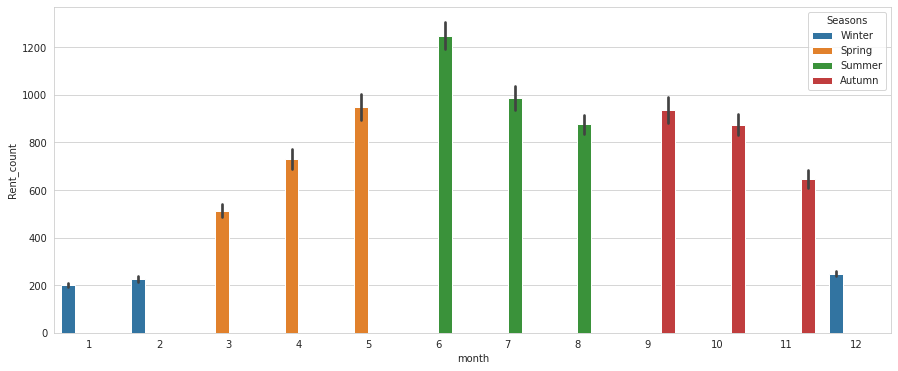

In [31]:
plt.figure(figsize =(15,6))
sns.barplot(x= 'month',y="Rent_count",hue = "Seasons",data=df)

**In this bar plot  ,summer  have more number of rent count.**

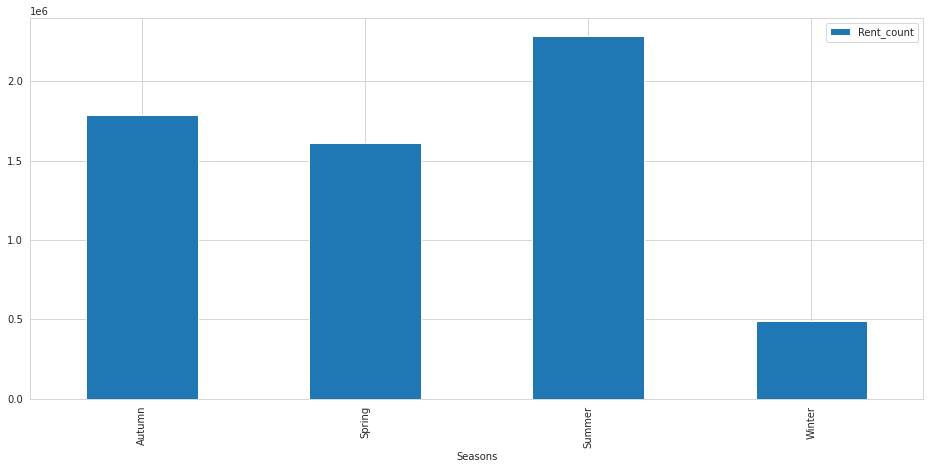

In [33]:
seasonly_booking = df.groupby('Seasons')['Rent_count'].sum().to_frame().plot(kind = 'bar',figsize=(16,7))
seasonly_booking

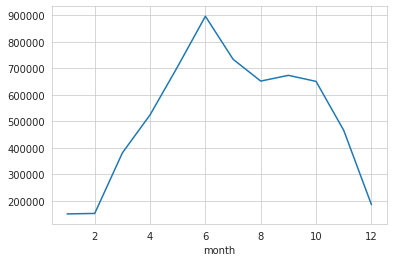

In [34]:
monthly_booking = df.groupby('month')['Rent_count'].sum()
monthly_booking.plot()

**Observation: the summer season and the month no-5,6,7,9 are the season in which the booking are heald.**

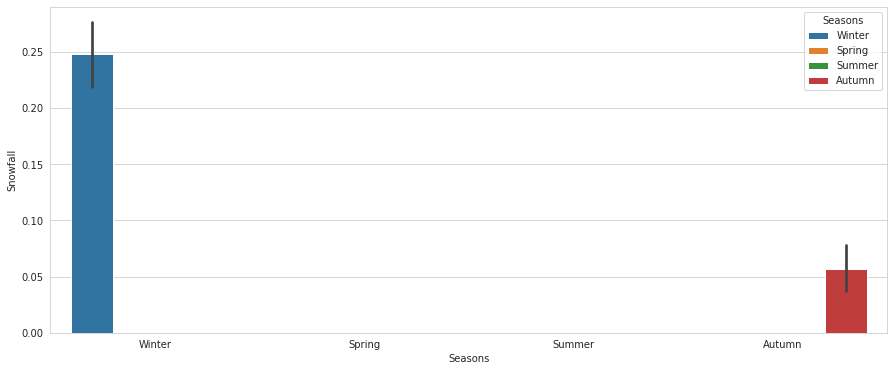

In [35]:
plt.figure(figsize =(15,6))
sns.barplot(x= 'Seasons',y="Snowfall",hue='Seasons',data=df)

**Observation : winter, autumn  has snowfall.**

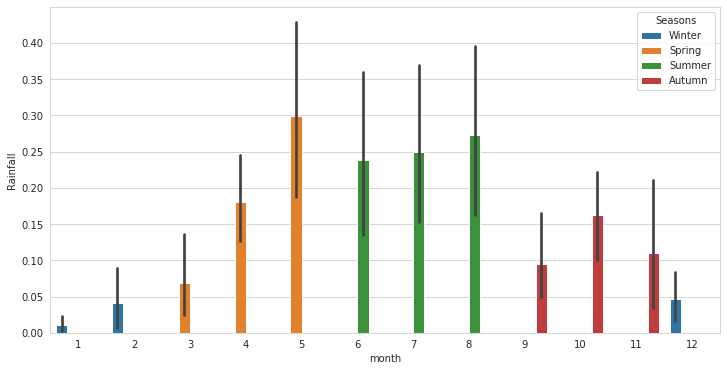

In [36]:
plt.figure(figsize =(12,6))
sns.barplot(x= 'month',y="Rainfall",hue='Seasons',data=df)

Observation: months(5,6,7,8) are more number of rainfall

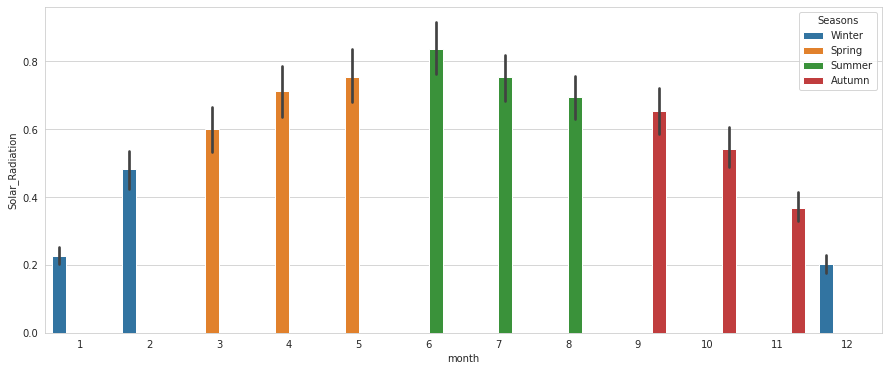

In [37]:
plt.figure(figsize =(15,6))
sns.barplot(x= 'month',y="Solar_Radiation",hue='Seasons',data=df)

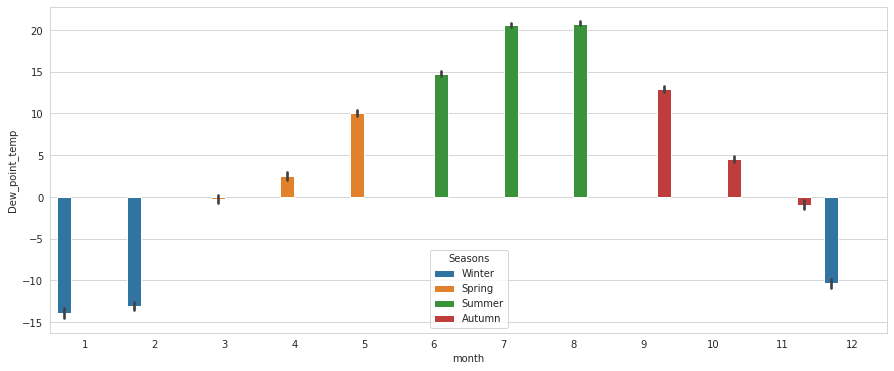

In [38]:
plt.figure(figsize =(15,6))
sns.barplot(x= 'month',y="Dew_point_temp",hue='Seasons',data=df)

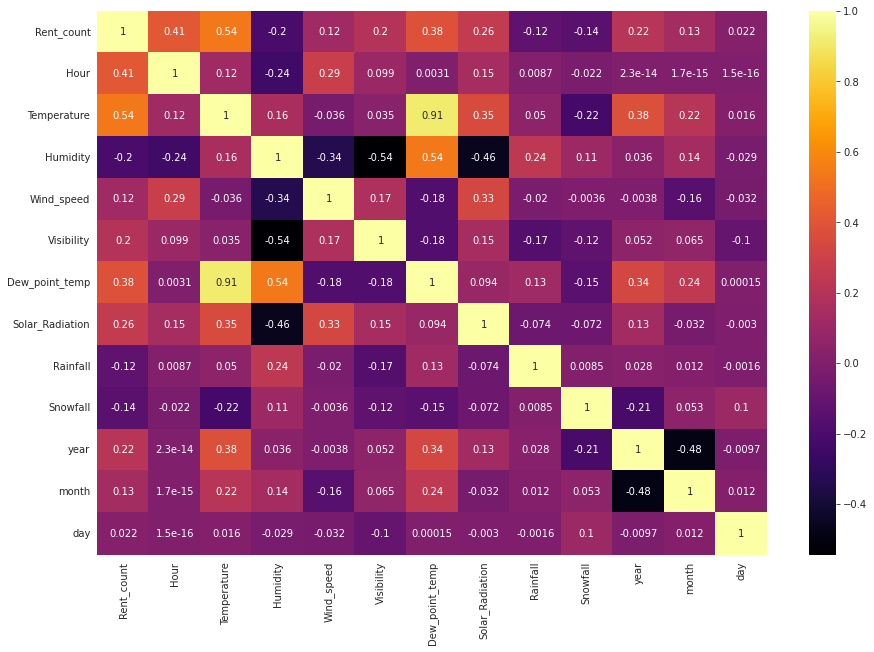

In [39]:
corr=df.corr()
plt.figure(figsize =(15,10))
sns.heatmap(corr,cmap="inferno",annot=True)

In [43]:
print(f' the columns present in our data set are:\n {str(df.columns)}')
print('*'*100)


numerical_columns=list(df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
print(str(f' the numerical features are:\n {numerical_features}'))
print('*'*100)


categorical_columns=list(df.select_dtypes(['object']).columns)
categorical_features=pd.Index(categorical_columns)
print(str(f' the catagorical features are:\n {categorical_features}'))
categorical_features

 the columns present in our data set are:
 Index(['Date', 'Rent_count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temp', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning Day', 'year', 'month',
       'day'],
      dtype='object')
****************************************************************************************************
 the numerical features are:
 Index(['Rent_count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temp', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'year', 'month', 'day'],
      dtype='object')
****************************************************************************************************
 the catagorical features are:
 Index(['Seasons', 'Holiday', 'Functioning Day'], dtype='object')


Index(['Seasons', 'Holiday', 'Functioning Day'], dtype='object')



---



---
# **Making a function to ploting and comparing with all independent varibale with the dependent variable**


In [41]:
def analysis(df,column):
  
  '''making a function to agrigation numerical
   value with the dependent values and ploting 
    the "scatterplot","barplot",'''

  # Making a data frame for each independent variable with the mean of dependent variable
  print(df.groupby([column]).agg({'Rent_count':"mean"}).sort_values(by=column,ascending = False))

  print("\n**************************************************************************************************************************\n")
  print(str('1.making a scatterplot for each independent variable with the mean of dependent variable').upper())
  print("\n**************************************************************************************************************************\n")
  # making a scatterplot for each independent variable with the mean of dependent variable
  f1=df[column].unique()
  f2=df.groupby([column])['Rent_count'].mean()
  plt.figure(figsize = (18, 7))
  sns.scatterplot(f1,f2,color='r')
  plt.xlabel(column, fontsize = 15)
  plt.ylabel('Rent_count', fontsize = 15)
  plt.show()

  print("\n**************************************************************************************************************************\n")
  print(str('2.making a scatterplot for each independent variable with out mean of dependent variable').upper())
  print("\n**************************************************************************************************************************\n")
  plt.scatter(df[column], df['Rent_count'], alpha=0.5,marker ="+",color = 'indigo')
  plt.rcParams['figure.figsize'] = (18, 7)
  # plt.figure(figsize = (18, 7))
  # plt.xlabel(column)
  # plt.ylabel('Rent_count')
  plt.show()

  print("\n**************************************************************************************************************************\n")
  print(str('3.making a barplot for each independent variable with the mean of dependent variable').upper())
  print("\n**************************************************************************************************************************\n")
  # making a barplot for each independent variable with the mean of dependent variable
  ((df.groupby([column])['Rent_count'].mean())).sort_values(ascending = False).head(6).plot.bar(color = ['violet','indigo','b','g','y','orange','r'])
  # plt.figure(figsize = (18, 7))
  plt.rcParams['figure.figsize'] = (18, 7)
  plt.xlabel(column, fontsize = 15)
  plt.ylabel('Rent_count', fontsize = 15)
  plt.show()

  print("\n**************************************************************************************************************************\n")
  print(str('4.making a barplot for each unique independent variable with the  average of dependent variable').upper())
  print("\n**************************************************************************************************************************\n")
  # making a barplot for each unique independent variable with the  average of dependent variable
  plt.figure(figsize = (18, 7))
  unique=df.groupby([column])['Rent_count'].mean()
  plt.bar(df[column].unique(),unique)
  plt.show()

  print("\n**************************************************************************************************************************\n")
  print(str('5.plot a bar plot for each numerical feature count (except dependent_variable)').upper())
  print("\n**************************************************************************************************************************\n")
  # # plot a bar plot for each numerical feature count (except dependent_variable)
  fig = plt.figure(figsize=(18, 7))
  ax = fig.gca()
  feature = df[column]
  feature.hist(bins=50, ax = ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title(column)
  plt.show()

             Rent_count
Temperature            
 39.4             561.0
 39.3             531.0
 39.0            1033.0
 38.7             475.0
 38.0            1184.0
...                 ...
-16.5              96.0
-16.9              36.0
-17.4              64.0
-17.5             145.5
-17.8             322.0

[546 rows x 1 columns]

**************************************************************************************************************************

1.MAKING A SCATTERPLOT FOR EACH INDEPENDENT VARIABLE WITH THE MEAN OF DEPENDENT VARIABLE

**************************************************************************************************************************



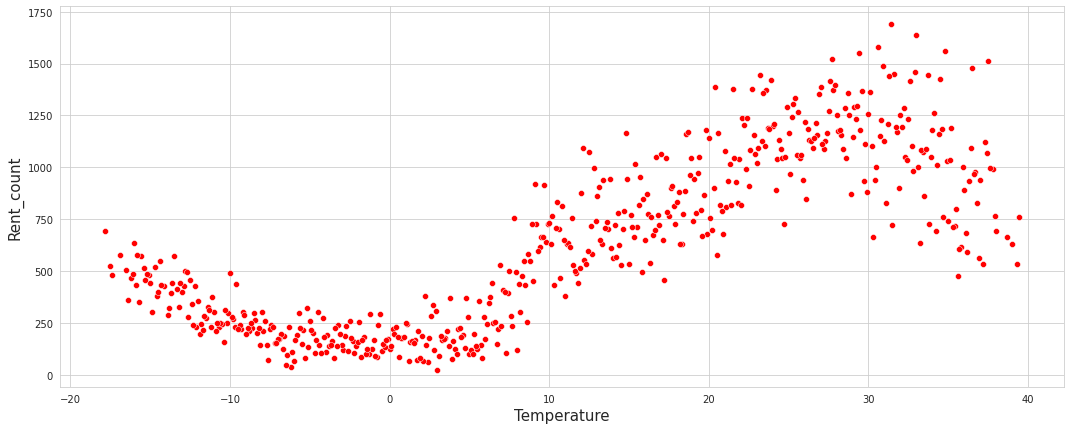


**************************************************************************************************************************

2.MAKING A SCATTERPLOT FOR EACH INDEPENDENT VARIABLE WITH OUT MEAN OF DEPENDENT VARIABLE

**************************************************************************************************************************



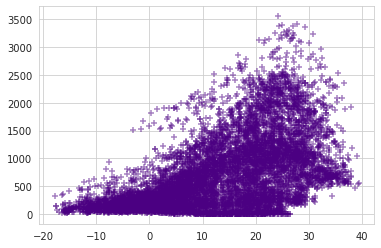


**************************************************************************************************************************

3.MAKING A BARPLOT FOR EACH INDEPENDENT VARIABLE WITH THE MEAN OF DEPENDENT VARIABLE

**************************************************************************************************************************



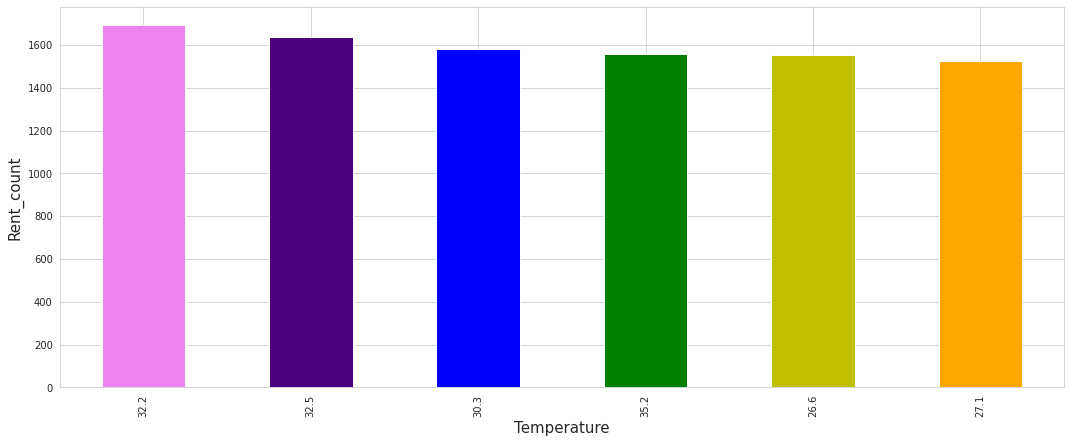


**************************************************************************************************************************

4.MAKING A BARPLOT FOR EACH UNIQUE INDEPENDENT VARIABLE WITH THE  AVERAGE OF DEPENDENT VARIABLE

**************************************************************************************************************************



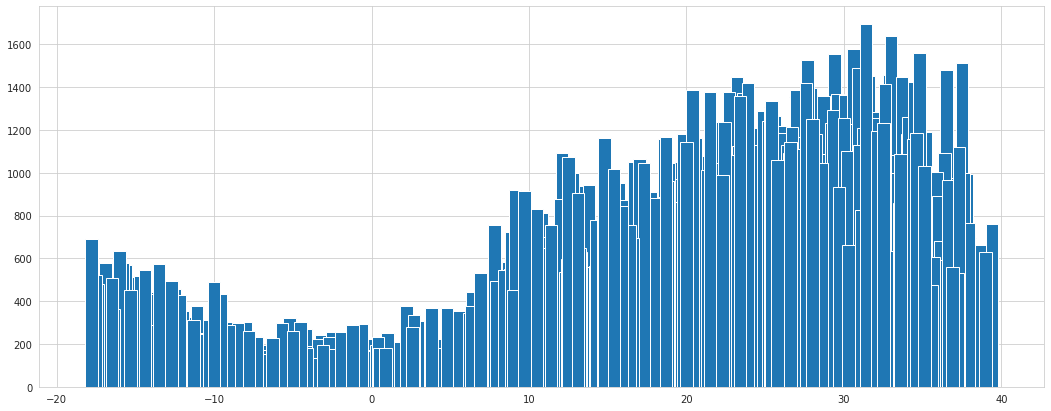


**************************************************************************************************************************

5.PLOT A BAR PLOT FOR EACH NUMERICAL FEATURE COUNT (EXCEPT DEPENDENT_VARIABLE)

**************************************************************************************************************************



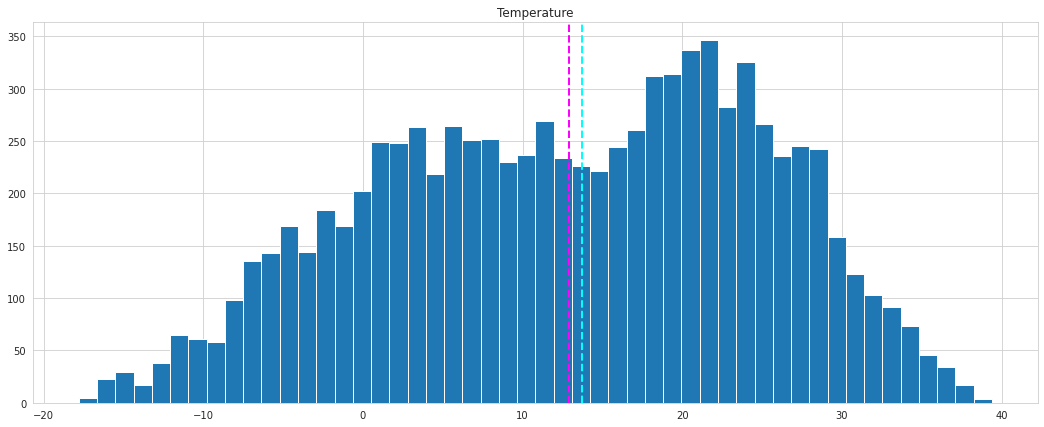

           Rent_count
Humidity             
98         172.320000
97         166.069364
96         170.828829
95         178.617647
94         253.129630
...               ...
13        1451.000000
12        2032.000000
11        1986.000000
10        1315.000000
0          407.647059

[90 rows x 1 columns]

**************************************************************************************************************************

1.MAKING A SCATTERPLOT FOR EACH INDEPENDENT VARIABLE WITH THE MEAN OF DEPENDENT VARIABLE

**************************************************************************************************************************



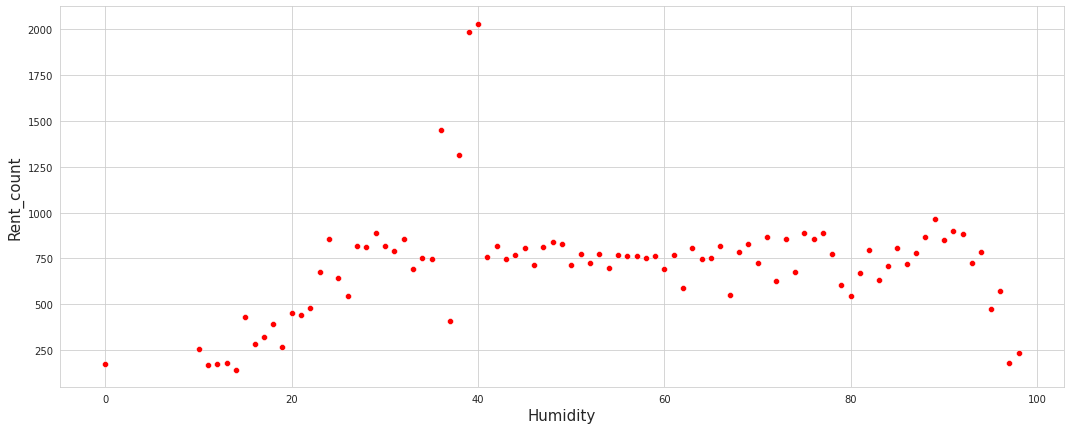


**************************************************************************************************************************

2.MAKING A SCATTERPLOT FOR EACH INDEPENDENT VARIABLE WITH OUT MEAN OF DEPENDENT VARIABLE

**************************************************************************************************************************



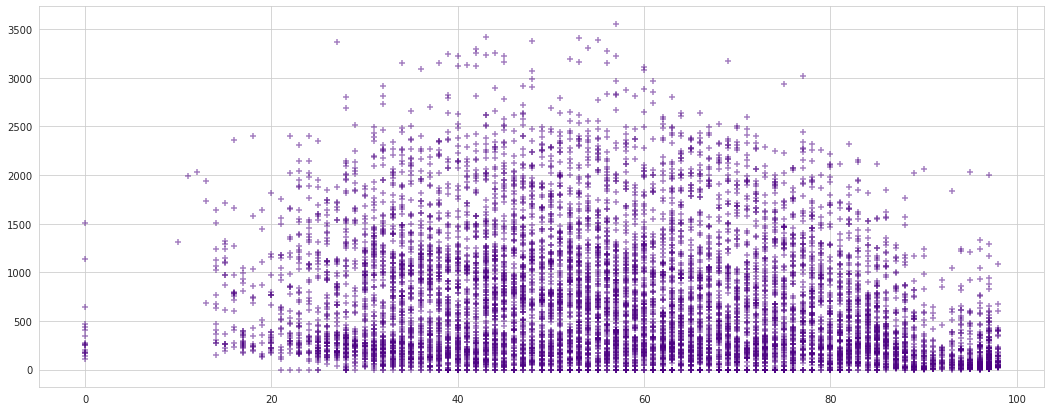


**************************************************************************************************************************

3.MAKING A BARPLOT FOR EACH INDEPENDENT VARIABLE WITH THE MEAN OF DEPENDENT VARIABLE

**************************************************************************************************************************



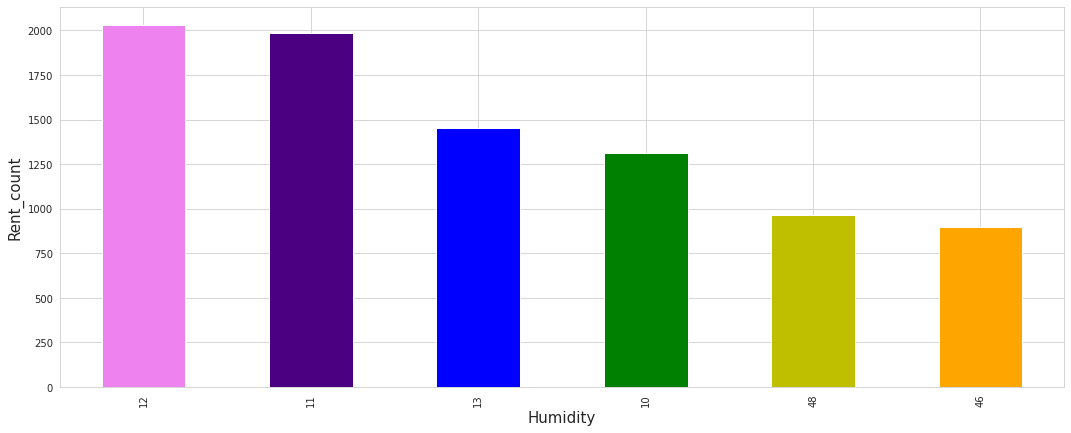


**************************************************************************************************************************

4.MAKING A BARPLOT FOR EACH UNIQUE INDEPENDENT VARIABLE WITH THE  AVERAGE OF DEPENDENT VARIABLE

**************************************************************************************************************************



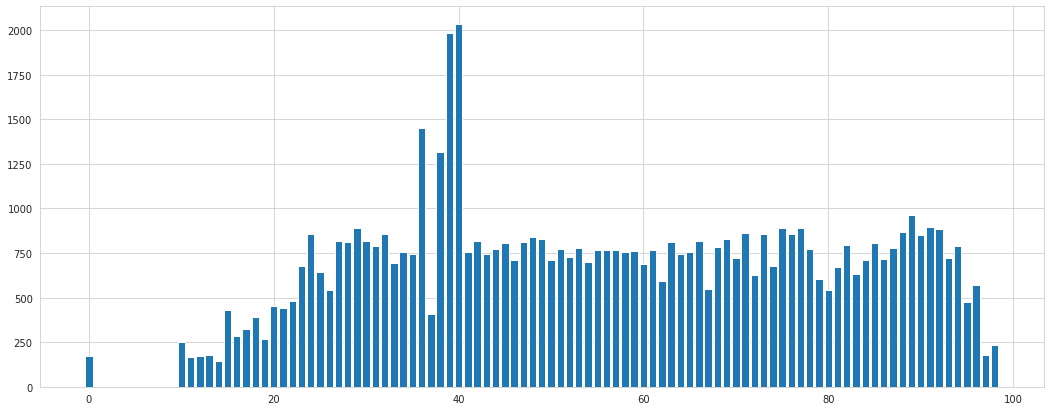


**************************************************************************************************************************

5.PLOT A BAR PLOT FOR EACH NUMERICAL FEATURE COUNT (EXCEPT DEPENDENT_VARIABLE)

**************************************************************************************************************************



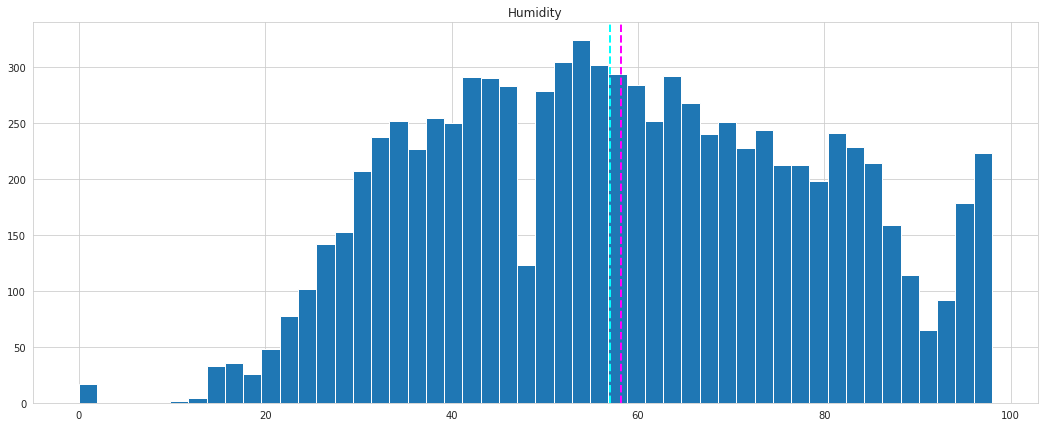

             Rent_count
Wind_speed             
7.4          913.000000
7.3          133.000000
7.2         1805.000000
6.9           49.000000
6.7          146.000000
...                 ...
0.4          470.731183
0.3          454.867089
0.2          498.011628
0.1          591.040816
0.0          448.027027

[65 rows x 1 columns]

**************************************************************************************************************************

1.MAKING A SCATTERPLOT FOR EACH INDEPENDENT VARIABLE WITH THE MEAN OF DEPENDENT VARIABLE

**************************************************************************************************************************



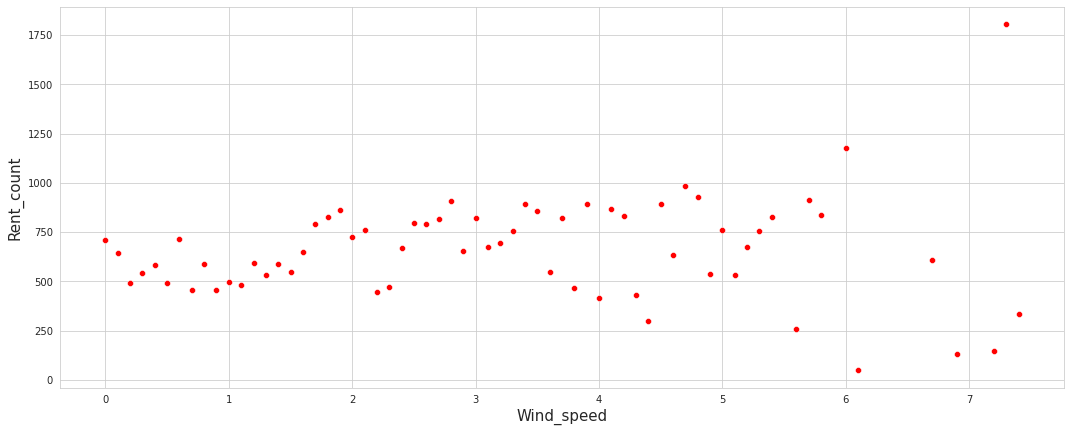


**************************************************************************************************************************

2.MAKING A SCATTERPLOT FOR EACH INDEPENDENT VARIABLE WITH OUT MEAN OF DEPENDENT VARIABLE

**************************************************************************************************************************



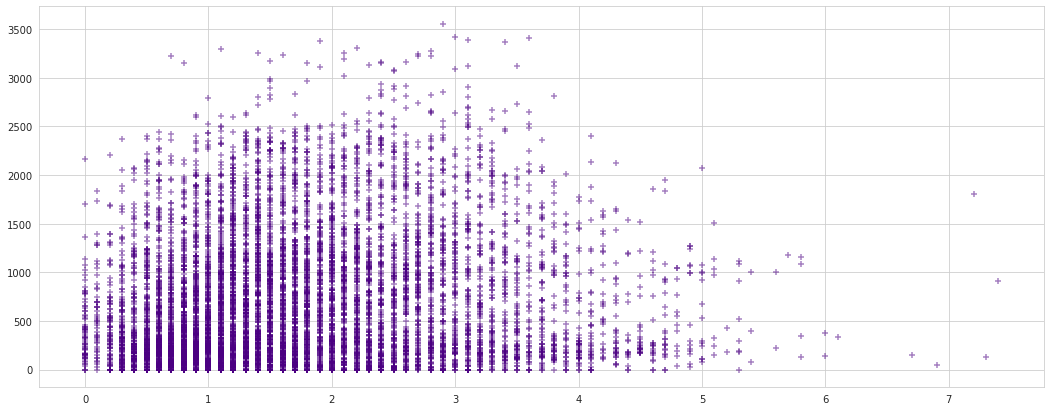


**************************************************************************************************************************

3.MAKING A BARPLOT FOR EACH INDEPENDENT VARIABLE WITH THE MEAN OF DEPENDENT VARIABLE

**************************************************************************************************************************



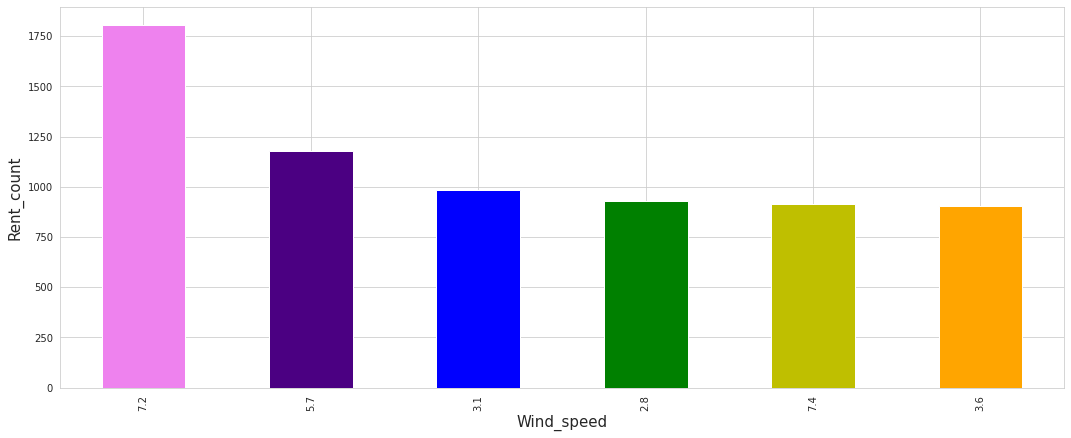


**************************************************************************************************************************

4.MAKING A BARPLOT FOR EACH UNIQUE INDEPENDENT VARIABLE WITH THE  AVERAGE OF DEPENDENT VARIABLE

**************************************************************************************************************************



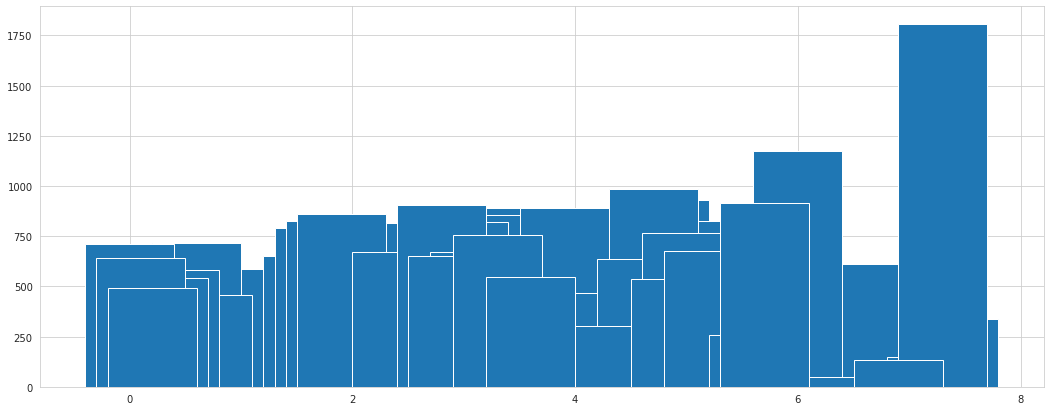


**************************************************************************************************************************

5.PLOT A BAR PLOT FOR EACH NUMERICAL FEATURE COUNT (EXCEPT DEPENDENT_VARIABLE)

**************************************************************************************************************************



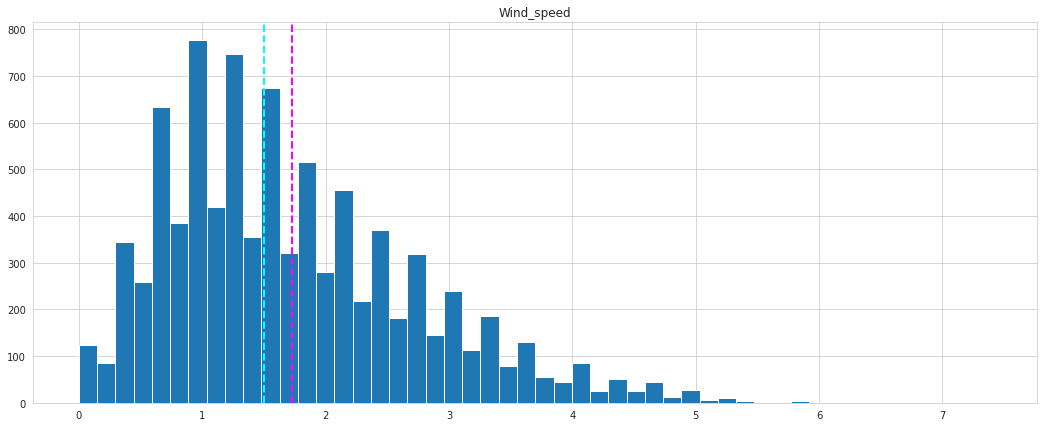

            Rent_count
Visibility            
2000        818.124722
1999        659.500000
1998        780.720000
1997        832.909091
1996        723.962963
...                ...
53           65.000000
38           98.000000
34           24.000000
33           33.000000
27           83.000000

[1789 rows x 1 columns]

**************************************************************************************************************************

1.MAKING A SCATTERPLOT FOR EACH INDEPENDENT VARIABLE WITH THE MEAN OF DEPENDENT VARIABLE

**************************************************************************************************************************



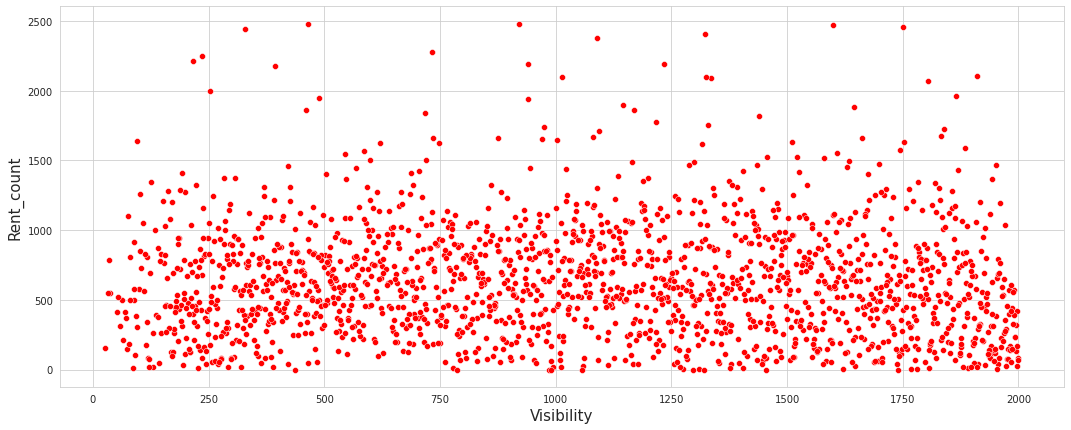


**************************************************************************************************************************

2.MAKING A SCATTERPLOT FOR EACH INDEPENDENT VARIABLE WITH OUT MEAN OF DEPENDENT VARIABLE

**************************************************************************************************************************



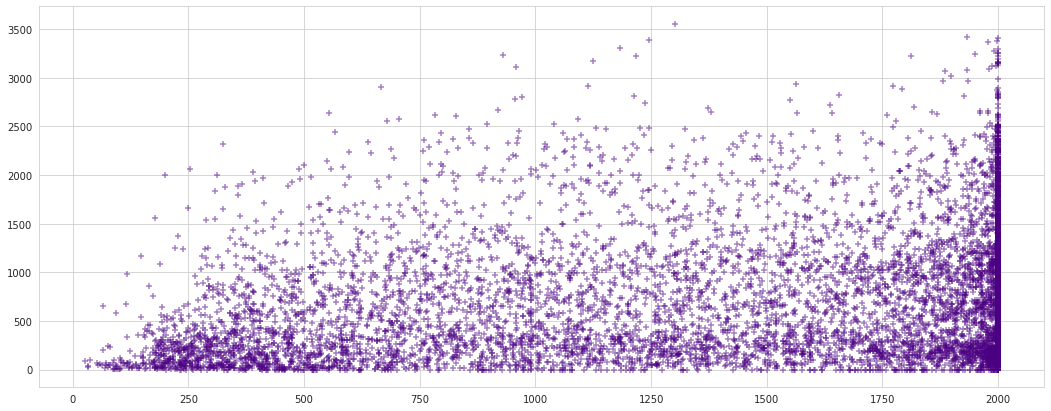


**************************************************************************************************************************

3.MAKING A BARPLOT FOR EACH INDEPENDENT VARIABLE WITH THE MEAN OF DEPENDENT VARIABLE

**************************************************************************************************************************



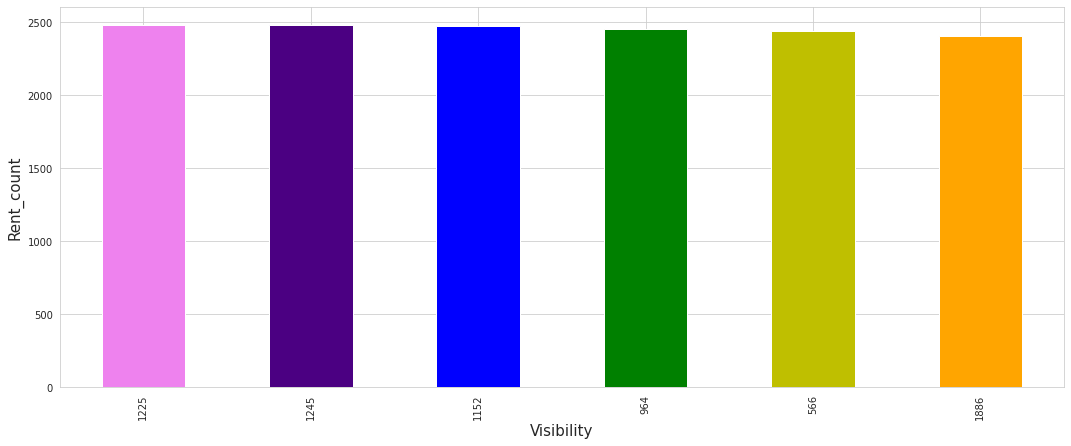


**************************************************************************************************************************

4.MAKING A BARPLOT FOR EACH UNIQUE INDEPENDENT VARIABLE WITH THE  AVERAGE OF DEPENDENT VARIABLE

**************************************************************************************************************************



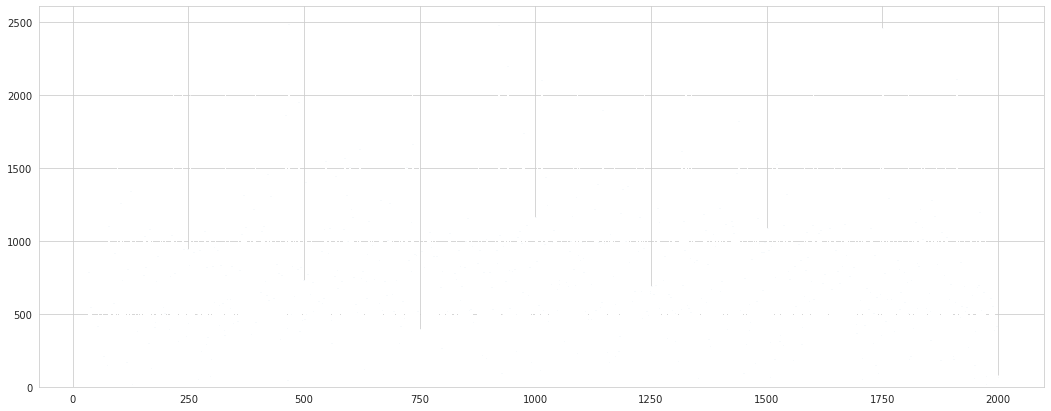


**************************************************************************************************************************

5.PLOT A BAR PLOT FOR EACH NUMERICAL FEATURE COUNT (EXCEPT DEPENDENT_VARIABLE)

**************************************************************************************************************************



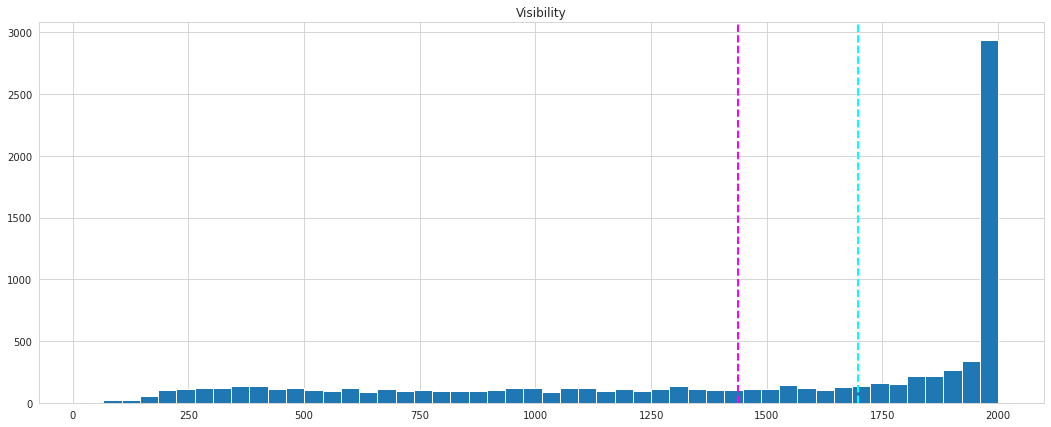

                 Rent_count
Dew_point_temp             
 27.2           1117.000000
 26.8            761.000000
 26.6            309.000000
 26.3            468.000000
 26.1            932.333333
...                     ...
-29.6             78.000000
-29.7             71.000000
-29.8            364.000000
-30.5            192.000000
-30.6             90.000000

[556 rows x 1 columns]

**************************************************************************************************************************

1.MAKING A SCATTERPLOT FOR EACH INDEPENDENT VARIABLE WITH THE MEAN OF DEPENDENT VARIABLE

**************************************************************************************************************************



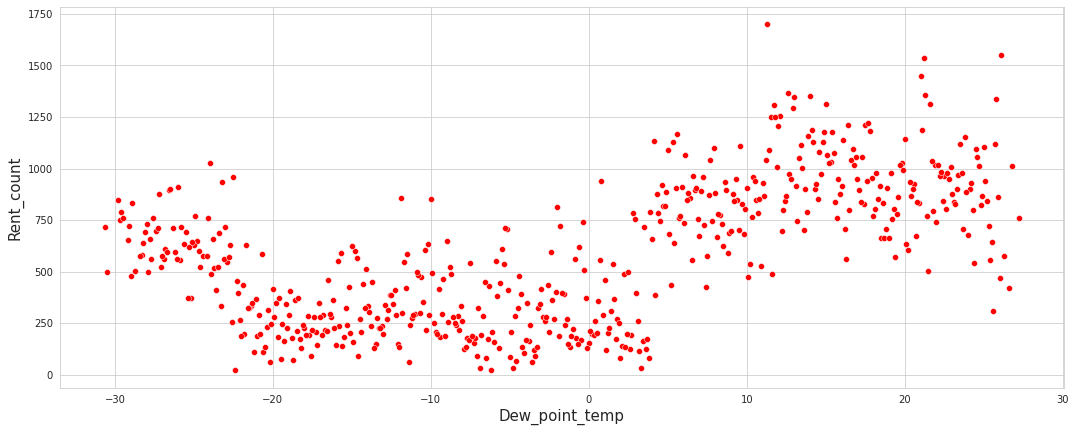


**************************************************************************************************************************

2.MAKING A SCATTERPLOT FOR EACH INDEPENDENT VARIABLE WITH OUT MEAN OF DEPENDENT VARIABLE

**************************************************************************************************************************



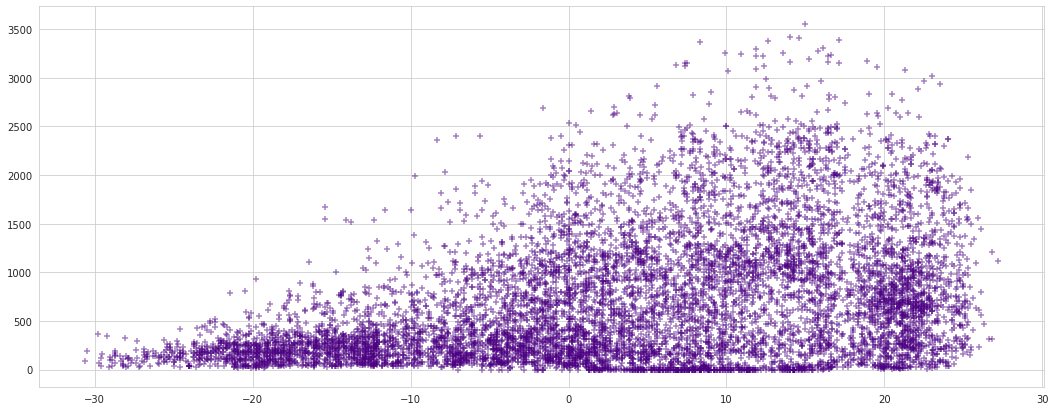


**************************************************************************************************************************

3.MAKING A BARPLOT FOR EACH INDEPENDENT VARIABLE WITH THE MEAN OF DEPENDENT VARIABLE

**************************************************************************************************************************



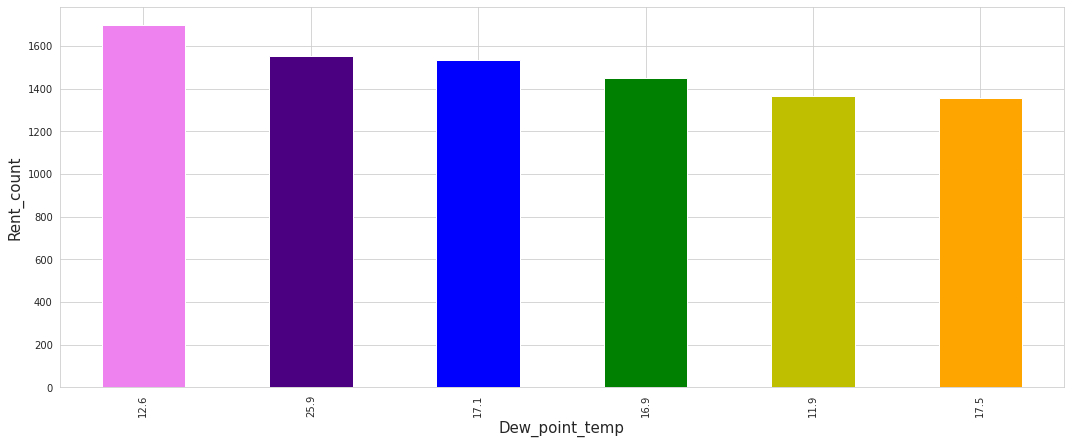


**************************************************************************************************************************

4.MAKING A BARPLOT FOR EACH UNIQUE INDEPENDENT VARIABLE WITH THE  AVERAGE OF DEPENDENT VARIABLE

**************************************************************************************************************************



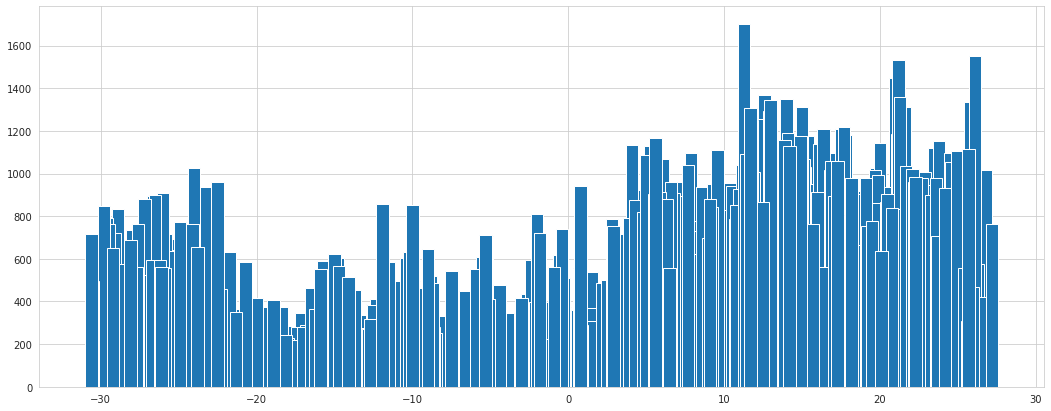


**************************************************************************************************************************

5.PLOT A BAR PLOT FOR EACH NUMERICAL FEATURE COUNT (EXCEPT DEPENDENT_VARIABLE)

**************************************************************************************************************************



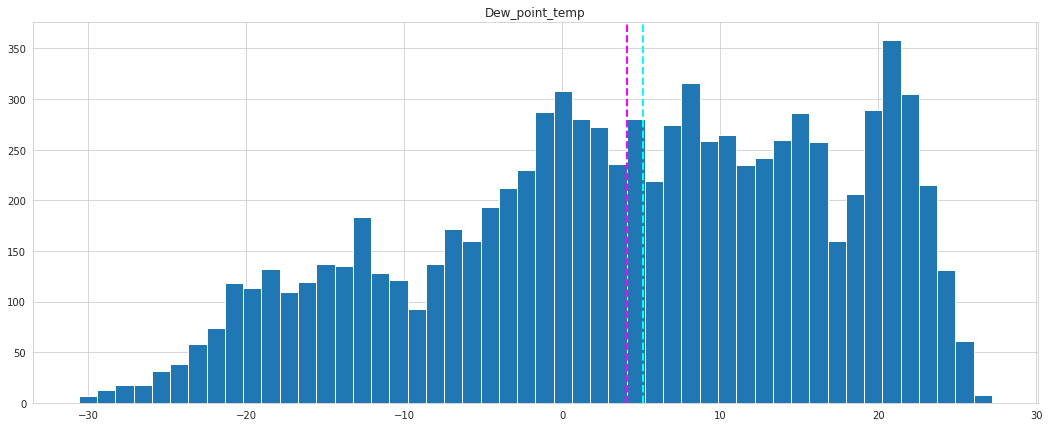

                  Rent_count
Solar_Radiation             
3.52             1516.000000
3.49             1456.000000
3.45              652.000000
3.44             1216.000000
3.42             1272.250000
...                      ...
0.04              766.361702
0.03              843.927536
0.02              800.524390
0.01              785.007812
0.00              487.064884

[345 rows x 1 columns]

**************************************************************************************************************************

1.MAKING A SCATTERPLOT FOR EACH INDEPENDENT VARIABLE WITH THE MEAN OF DEPENDENT VARIABLE

**************************************************************************************************************************



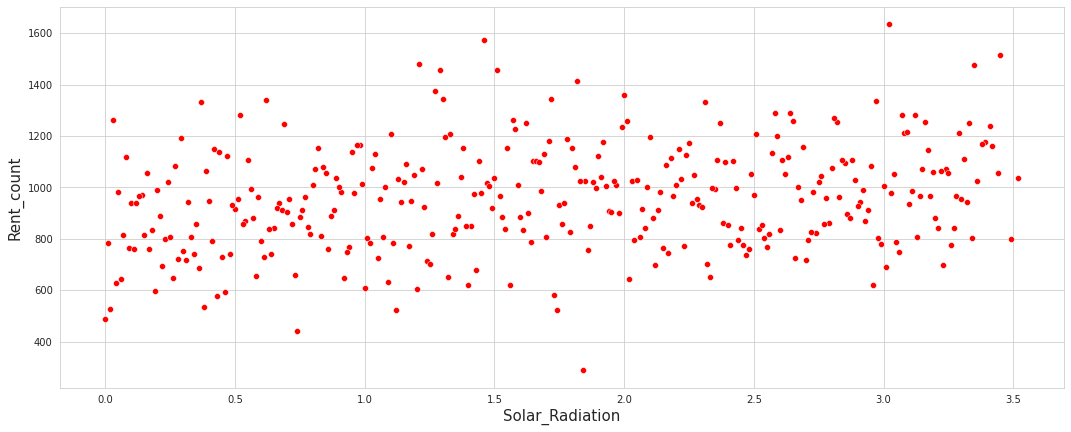


**************************************************************************************************************************

2.MAKING A SCATTERPLOT FOR EACH INDEPENDENT VARIABLE WITH OUT MEAN OF DEPENDENT VARIABLE

**************************************************************************************************************************



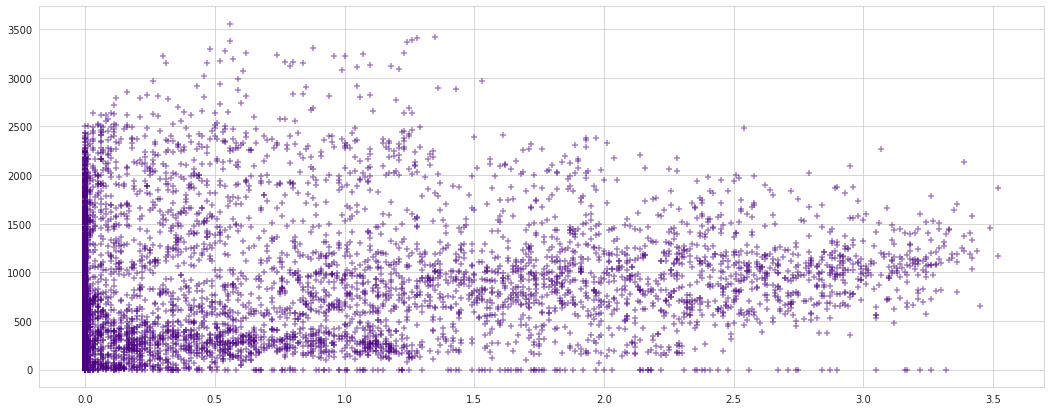


**************************************************************************************************************************

3.MAKING A BARPLOT FOR EACH INDEPENDENT VARIABLE WITH THE MEAN OF DEPENDENT VARIABLE

**************************************************************************************************************************



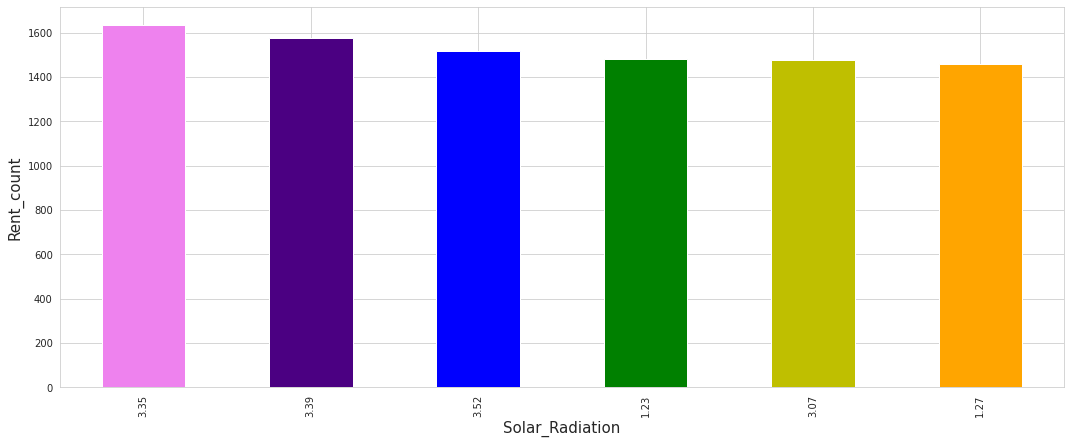


**************************************************************************************************************************

4.MAKING A BARPLOT FOR EACH UNIQUE INDEPENDENT VARIABLE WITH THE  AVERAGE OF DEPENDENT VARIABLE

**************************************************************************************************************************



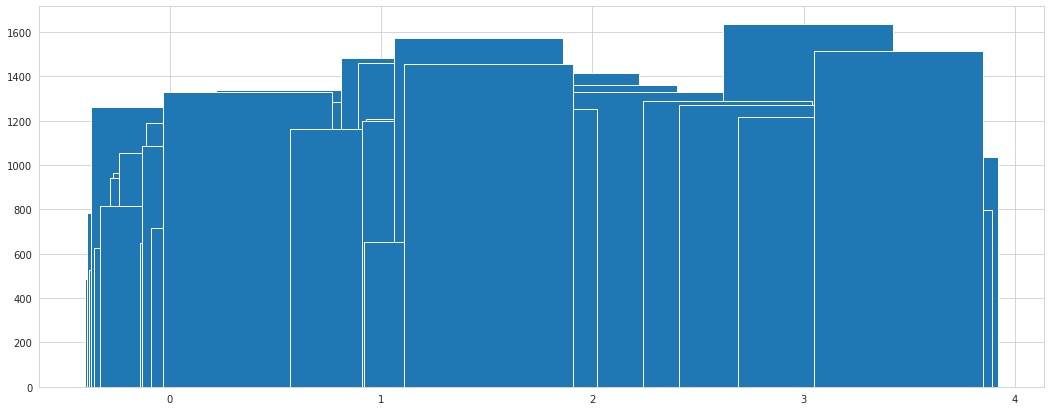


**************************************************************************************************************************

5.PLOT A BAR PLOT FOR EACH NUMERICAL FEATURE COUNT (EXCEPT DEPENDENT_VARIABLE)

**************************************************************************************************************************



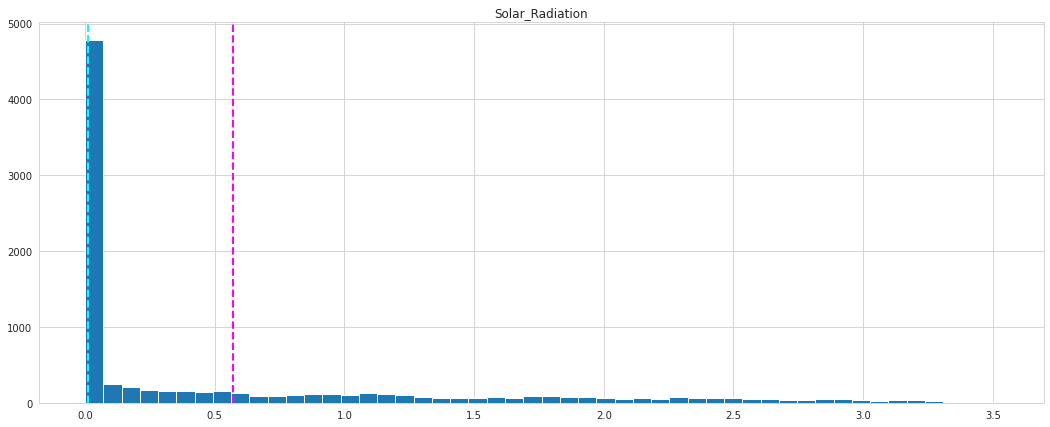

          Rent_count
Rainfall            
35.0      151.000000
29.5      122.000000
24.0       61.000000
21.5      596.000000
21.0       19.000000
...              ...
0.4       134.187500
0.3       155.666667
0.2       185.300000
0.1       329.978261
0.0       739.311103

[61 rows x 1 columns]

**************************************************************************************************************************

1.MAKING A SCATTERPLOT FOR EACH INDEPENDENT VARIABLE WITH THE MEAN OF DEPENDENT VARIABLE

**************************************************************************************************************************



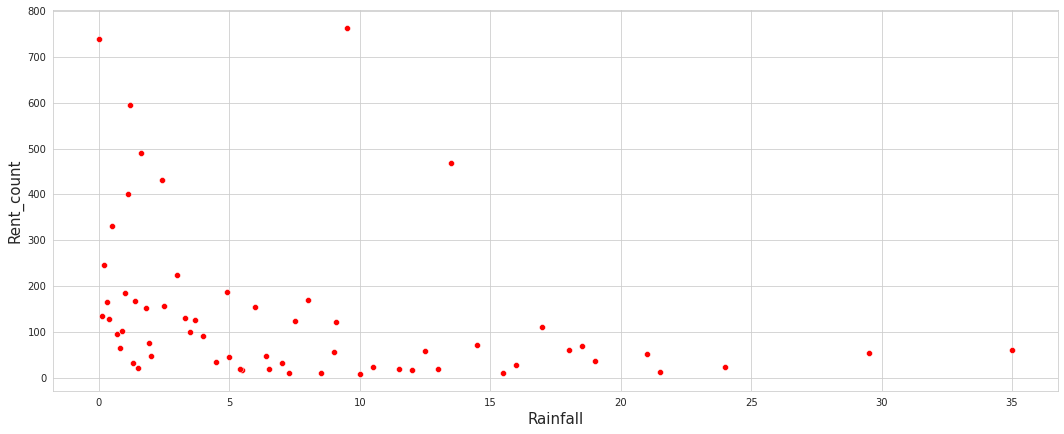


**************************************************************************************************************************

2.MAKING A SCATTERPLOT FOR EACH INDEPENDENT VARIABLE WITH OUT MEAN OF DEPENDENT VARIABLE

**************************************************************************************************************************



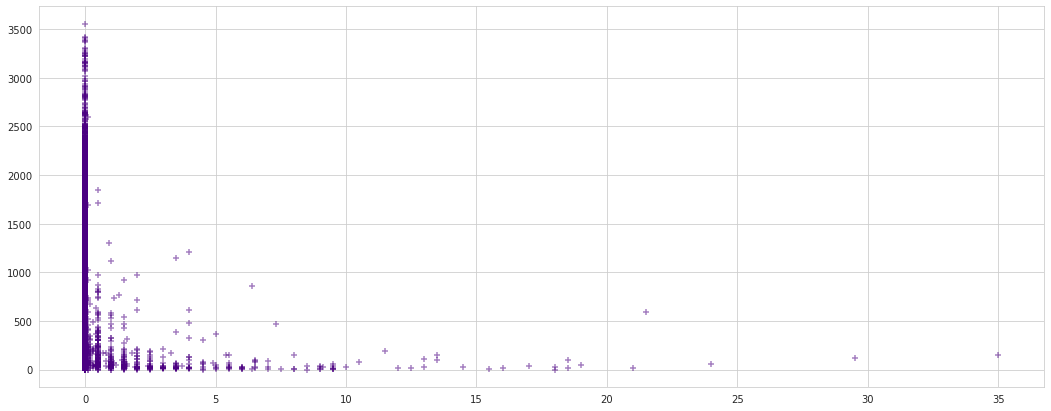


**************************************************************************************************************************

3.MAKING A BARPLOT FOR EACH INDEPENDENT VARIABLE WITH THE MEAN OF DEPENDENT VARIABLE

**************************************************************************************************************************



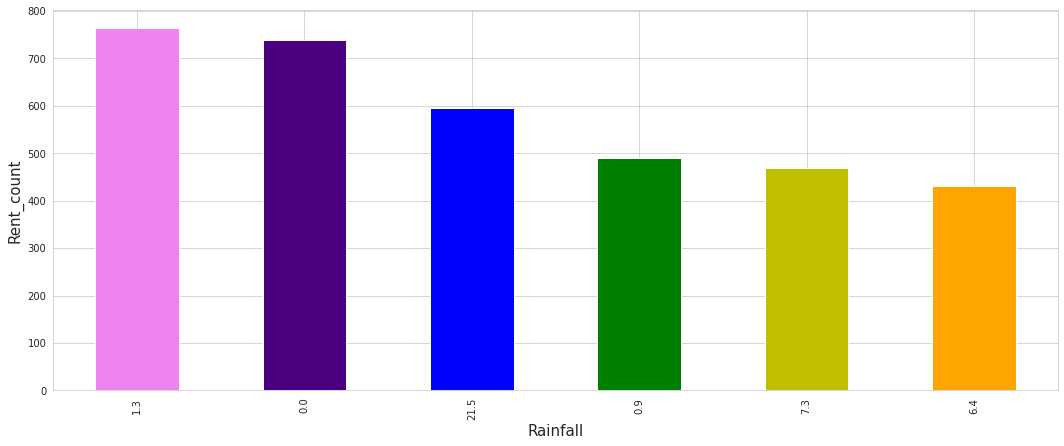


**************************************************************************************************************************

4.MAKING A BARPLOT FOR EACH UNIQUE INDEPENDENT VARIABLE WITH THE  AVERAGE OF DEPENDENT VARIABLE

**************************************************************************************************************************



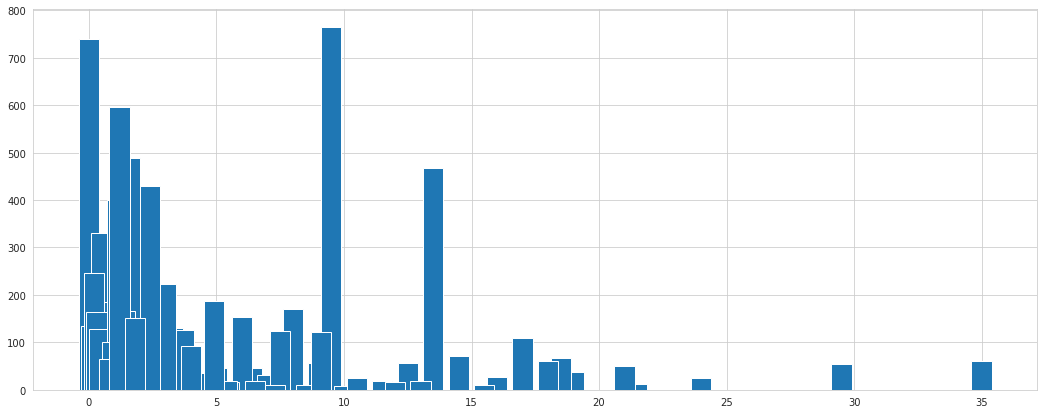


**************************************************************************************************************************

5.PLOT A BAR PLOT FOR EACH NUMERICAL FEATURE COUNT (EXCEPT DEPENDENT_VARIABLE)

**************************************************************************************************************************



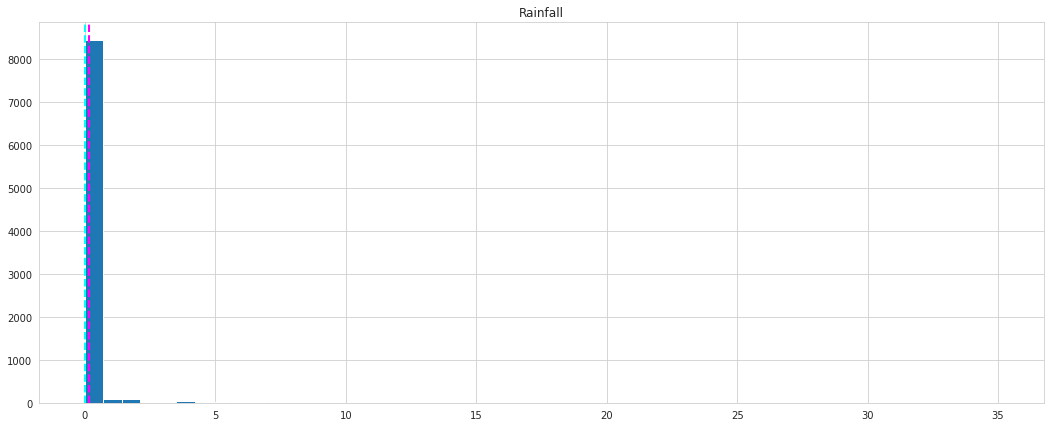

          Rent_count
Snowfall            
8.8        88.000000
7.1        24.000000
7.0       167.000000
6.0       241.000000
5.1        62.000000
5.0       187.000000
4.8        40.000000
4.3        25.000000
4.2       116.000000
4.1       114.750000
4.0        40.000000
3.9        47.000000
3.8        92.000000
3.7       263.000000
3.6       436.000000
3.5       132.571429
3.4       183.500000
3.3       280.333333
3.2       256.750000
3.1       119.000000
3.0       233.800000
2.9       327.500000
2.8       177.500000
2.7       168.166667
2.6       108.583333
2.5       198.000000
2.4       264.000000
2.3       299.000000
2.2       211.833333
2.1       182.000000
2.0       190.500000
1.9       234.333333
1.8       310.200000
1.7       251.333333
1.6       198.473684
1.5       168.000000
1.4       214.500000
1.3       273.000000
1.2        54.375000
1.1       366.000000
1.0       163.000000
0.9       142.764706
0.8       256.000000
0.7       164.774194
0.6       185.000000
0.5       138

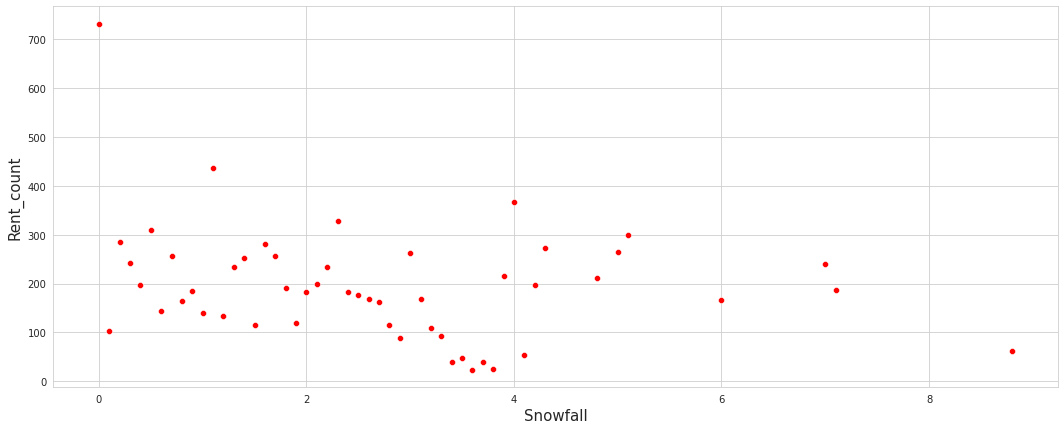


**************************************************************************************************************************

2.MAKING A SCATTERPLOT FOR EACH INDEPENDENT VARIABLE WITH OUT MEAN OF DEPENDENT VARIABLE

**************************************************************************************************************************



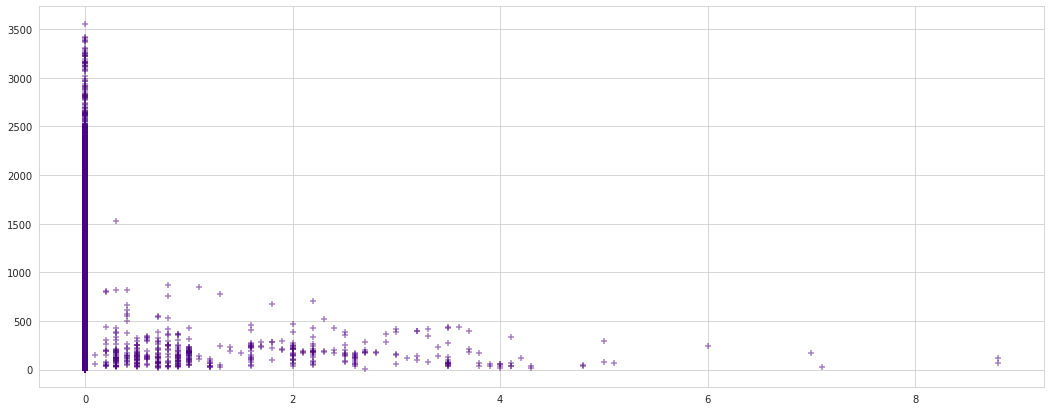


**************************************************************************************************************************

3.MAKING A BARPLOT FOR EACH INDEPENDENT VARIABLE WITH THE MEAN OF DEPENDENT VARIABLE

**************************************************************************************************************************



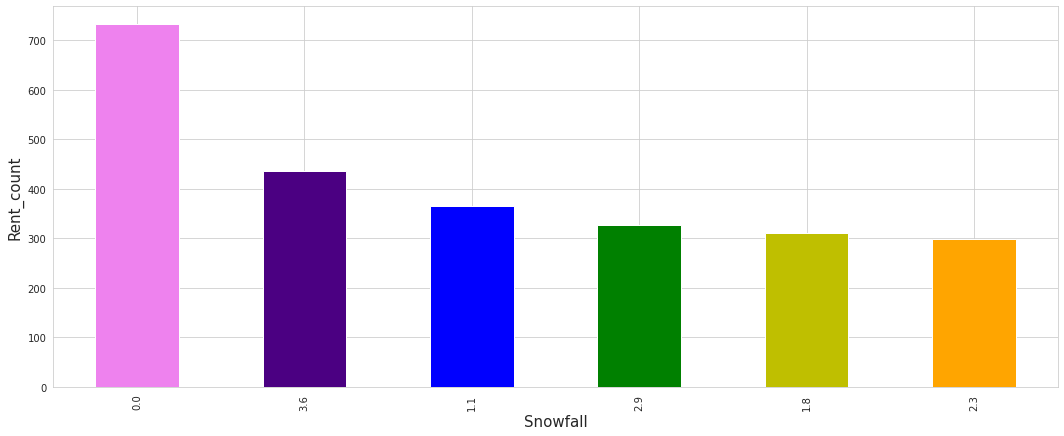


**************************************************************************************************************************

4.MAKING A BARPLOT FOR EACH UNIQUE INDEPENDENT VARIABLE WITH THE  AVERAGE OF DEPENDENT VARIABLE

**************************************************************************************************************************



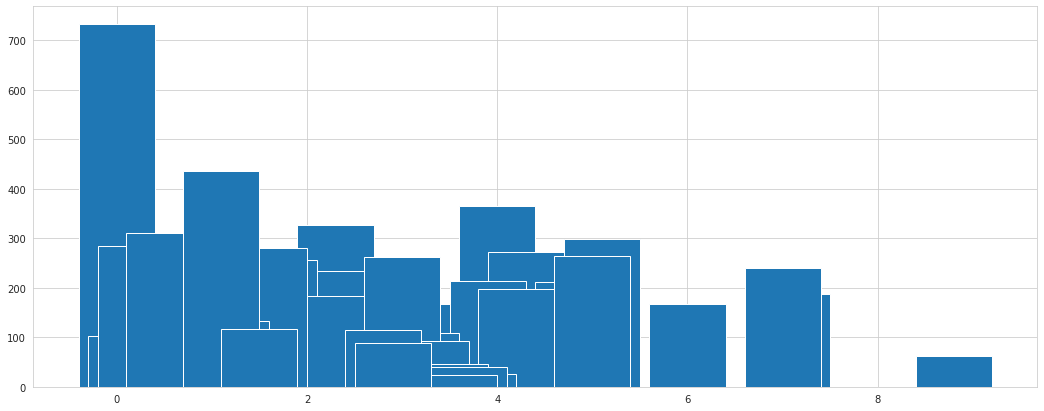


**************************************************************************************************************************

5.PLOT A BAR PLOT FOR EACH NUMERICAL FEATURE COUNT (EXCEPT DEPENDENT_VARIABLE)

**************************************************************************************************************************



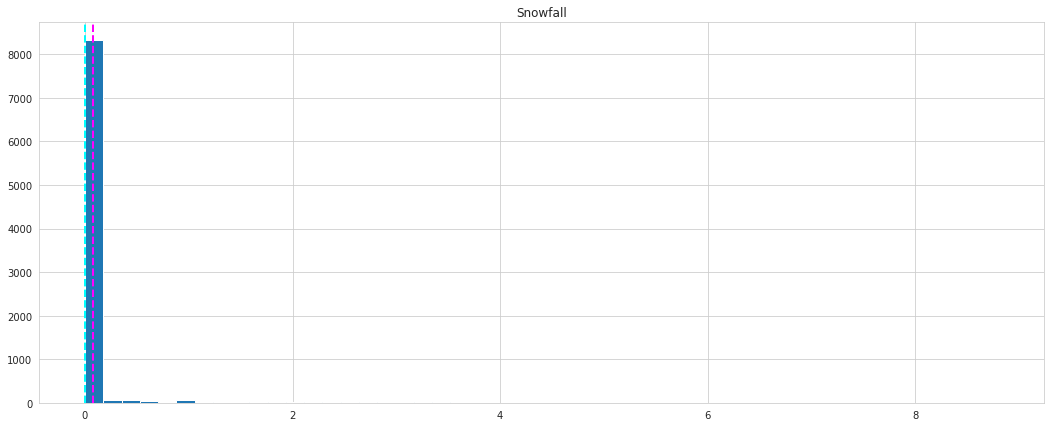

In [44]:
for column in numerical_columns[2:10]:
  # print(column)
  analysis(df,column)